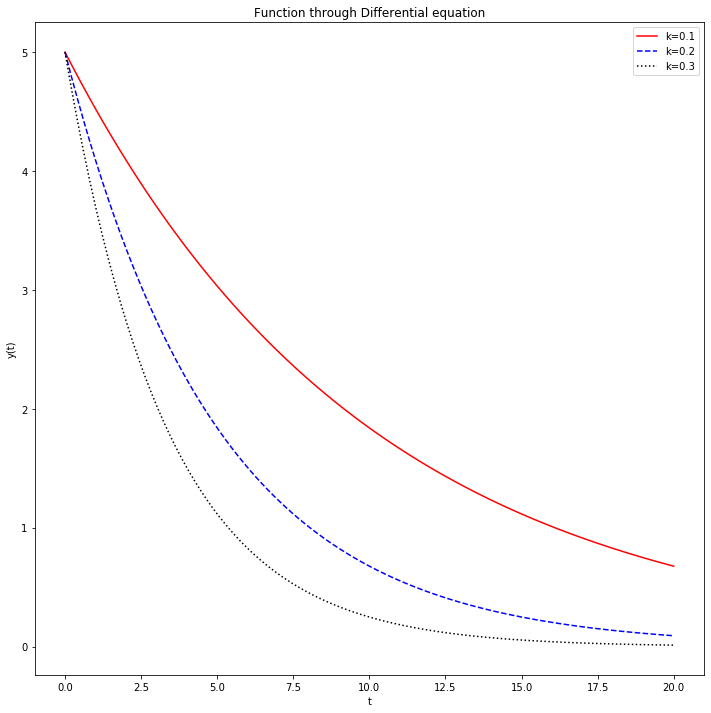

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model(y,t,k):
    dydt = -k * y
    return dydt

t = np.linspace(0,20,100)
y0 = 5

k = 0.1
y1 = odeint(model, y0, t, args=(k, ))

k = 0.2
y2 = odeint(model, y0, t, args=(k, ))

k = 0.3
y3 = odeint(model, y0, t, args=(k, ))


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.plot(t, y1, 'r-', label="k=0.1")
ax.plot(t, y2, 'b--', label="k=0.2")
ax.plot(t, y3, 'k:', label="k=0.3")

ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.set_title('Function through Differential equation')

plt.legend()
plt.show()

In [32]:
## model(y,t) and model(t,y) are different. y,t should be in the same order as dydt.

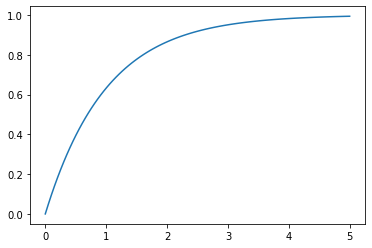

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model(y, t):
    dydt = -y + 1.0
    return dydt

t = np.linspace(0,5,100)
y0 = 0

y = odeint(model, y0, t)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t,y)

plt.show()

In [ ]:
## The next t value uses the value of y at previous t to find the constant for the function f. Therefore we don't need to specify if the function changes. odeint automatically finds the constant for the another function 

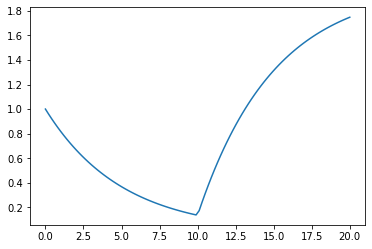

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model(y, t):
    if t<10:
        u=0
    else:
        u=2    
        
    dydt = (-y + u)/5
    return dydt
        
    
t = np.linspace(0,20,100)
y0 = 1

y = odeint(model, y0, t)
plt.plot(t,y)
plt.show()

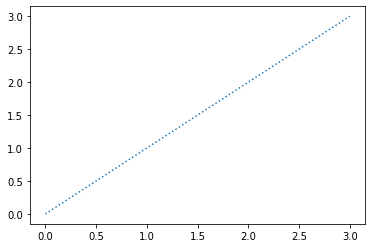

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model1(x,t):
    dxdt = 3*np.exp(-t)
    return dxdt

def model2(y,t):
    dydt = 3-y
    return dydt

t = np.linspace(0,20,100)
x0 = 0
y0 = 0

x = odeint(model1, x0, t)
y = odeint(model2, y0, t)

plt.plot(x,y,':')
plt.show()

In [43]:
## z will be of the form [[x0,y0],[x1,y1],[x3,y3]........]

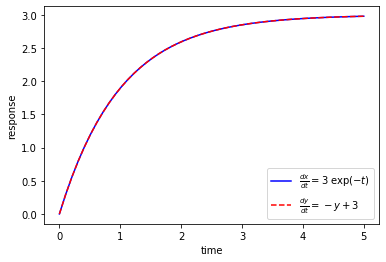

In [42]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# time points
t = np.linspace(0,5)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

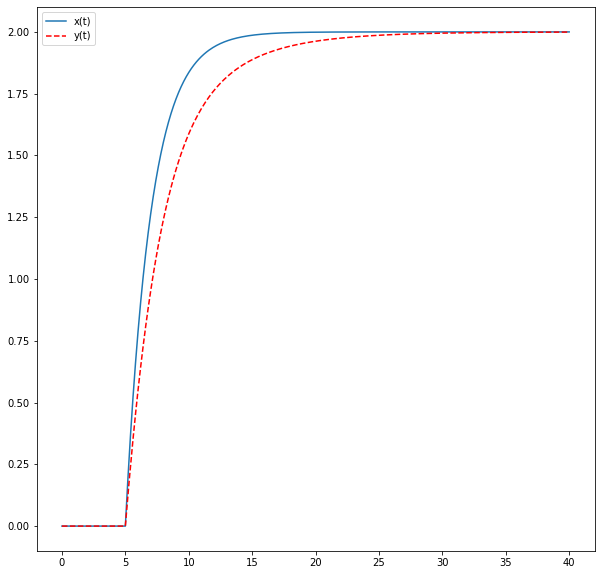

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model(x,t):
    if t<5:
        u = 0
    else:
        u = 2
    dxdt = (u-x)/2
    return dxdt

t = np.linspace(0,40,401)
x0 = 0

x = odeint(model, x0, t)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(t,x, label="x(t)")

def model2(y,t,k):
    dydt = (k-y)/5
    return dydt

y0 = 0
y = np.empty_like(t)

for i in range(401):
    y[i] = odeint(model2, x0, t, args=(x[i], ))[i]
        
ax.plot(t,y,'--r', label="y(t)")
ax.legend()
plt.show()

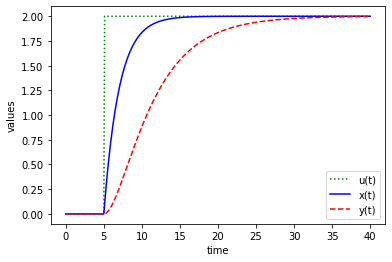

In [101]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()